# Introduction to Regression with Neural Network in Tensorflow

there are many definitions for a regression problem but in our case, we're going to simlify it: predicting a numerical variable based on some other combination of variables, even shorter.. predicting a number.



In [1]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.18.0


### Creating data to view and fit

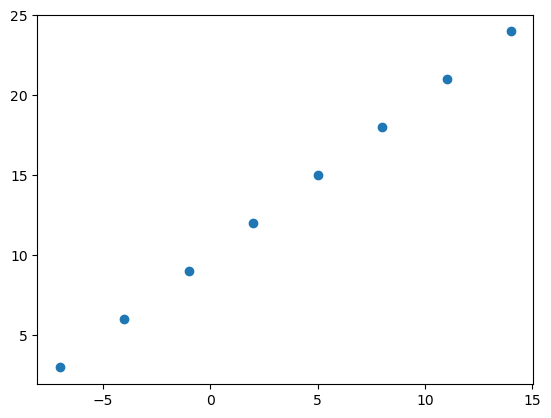

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Create a demo tensor for our housing price prediction
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
X[1], y[1]

(-4.0, 6.0)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [8]:
X[0].ndim

0

In [9]:
X[0], y[0]

(-7.0, 3.0)

In [10]:
# Turn our Numpy into tensors
X = tf.constant(X, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

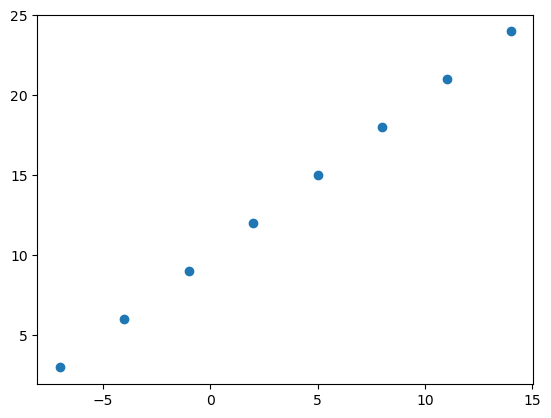

In [12]:
plt.scatter(X, y)

## Steps in modelling with Tensorflow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X and y (features and labels).

In [13]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step - loss: 15.3082 - mae: 15.3082
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 15.0269 - mae: 15.0269
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 14.8229 - mae: 14.8229
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 14.6904 - mae: 14.6904
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 14.5579 - mae: 14.5579


In [14]:
# Check out X and y
X.numpy(), y.numpy()

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32))

In [15]:
# Try and make predictions on our trained model
y_pred = model.predict(tf.constant([17.0]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


array([[-4.6685715]], dtype=float32)

## Improving our model

We can improve our model by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers,
increase the number of hidden units within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the learning rate of optimization function.
3. **Fitting a model** - Here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from)

In [16]:
# Let's rebuild our model

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step - loss: 17.5584 - mae: 17.5584
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 17.2771 - mae: 17.2771
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 16.9959 - mae: 16.9959
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 16.7146 - mae: 16.7146
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 16.4334 - mae: 16.4334
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 16.1521 - mae: 16.1521
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 15.8709 - mae: 15.8709
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 15.5896 - mae: 15.5896
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 15.3084 - mae: 15.3084
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 15.0271 - mae: 15.0271
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 14.7931 - mae: 14.7931
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 14.6606 - mae: 14.6606
Epoch 13/100
1/1 ━━━━━━━

In [17]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [18]:
# Let's see if our model's predictions has improved ...
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([[29.357592]], dtype=float32)

In [19]:
# Let's rebuild the model with 1 tweek

# 1. Creating a model
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(1)
    ]
)

# 2. Compiling the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fitting the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step - loss: 13.1775 - mae: 13.1775
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 12.7306 - mae: 12.7306
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 12.2801 - mae: 12.2801
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 11.8282 - mae: 11.8282
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 11.3788 - mae: 11.3788
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 10.9141 - mae: 10.9141
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 10.4235 - mae: 10.4235
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 9.9092 - mae: 9.9092
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 9.3690 - mae: 9.3690
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 8.7945 - mae: 8.7945
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 8.1800 - mae: 8.1800
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 7.5202 - mae: 7.5202
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━

In [20]:
# Check for predictions
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


array([[32.02333]], dtype=float32)

In [21]:
# Let's rebuild the model with 1 tweek

# 1. Creating a model
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(1)
    ]
)

# 2. Compiling the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# 3. Fitting the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 12.9993 - mae: 12.9993
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 12.1187 - mae: 12.1187
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 11.2235 - mae: 11.2235
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 10.4449 - mae: 10.4449
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 9.7754 - mae: 9.7754
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 9.0864 - mae: 9.0864
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 8.3771 - mae: 8.3771
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 7.6392 - mae: 7.6392
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 6.8715 - mae: 6.8715
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 6.0711 - mae: 6.0711
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 5.2364 - mae: 5.2364
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 4.3645 - mae: 4.3645
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

In [21]:
# Check for predictions
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([[32.02333]], dtype=float32)

## Evaluating a model

in practice, a typical workflow you'll go through when building neural networks is:

```
Build a model - fit it - evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it .........
```

When it comes to evaluation there are 3 words you should memorize:

> "Visulaize, visualize, visualize"

It's a good idea to visualize:
* the data - what data are we working with? What does it look like?

* The model itself - what does our model look like?

* The training of a model - How does a model perform  while it learns?

* The predictions of the model - how do the predictions of a model line up against the ground truth ( the original label )

In [22]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [23]:
 # Make labels for the dataset
 y = X + 10
 y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

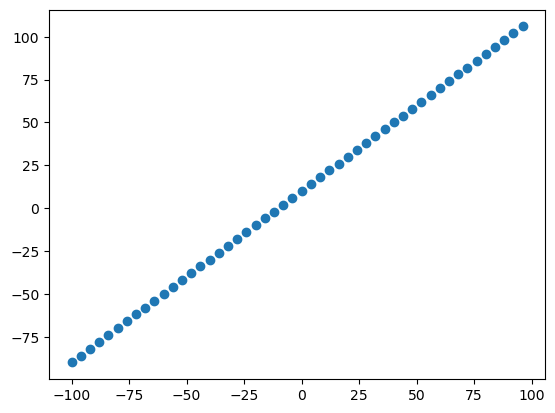

In [24]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

### The 3 sets....

* Training set - the model learns from the data, which is typically 70-80% of the total data
* Validation set - the model gets tuned on the validation set, which is typically 10-15% of the total data
* Test set - the model gets evaluated on the test set, which is typically 10-15% of the total data

In [25]:
train_size = int(0.8*(len(X)))
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

Visualize the data

Now we've got our data in training and test sets... let's visualize it agian.

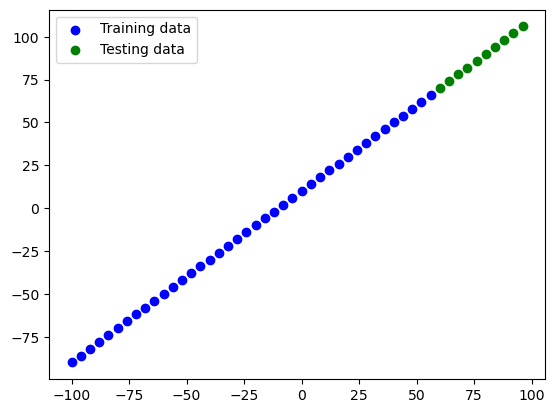

In [26]:
plt.scatter(X_train, y_train, c='b', label='Training data')
plt.scatter(X_test, y_test, c='g', label='Testing data')
plt.legend();

In [27]:
# Let's have a look at how to build a neural network for our data.

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae ,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

## Visuallizing the model

In [28]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Let's create a model which builds automatically by defining the input_shape argument in first layer
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1, name='output_layer')
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

In [30]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 141 (564.00 B)

 Trainable params: 141 (564.00 B)

 Non-trainable params: 0 (0.00 B)

* Total params - total number of parameters in the model.
* Trainable params - number of parameters that will actually change during learning
* Non-trainable params - these parameters are'nt updated dufing training (this is typical when you bring in already learned parameters from other models during transfer learning.)


In [31]:
# Let's fit the model on training data
model.fit(X_train, y_train, epochs=150, verbose=0)

In [32]:
# Get the summary of our model
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 425 (1.66 KB)

 Trainable params: 141 (564.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 284 (1.11 KB)

In [33]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


## Visualizing our model's prediction

To visualize predictions, it's a good idea to plot them against the ground truth labels.

often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground turht vs your model's predictions)

In [34]:
# Make some predidctions
y_preds = model.predict(X_test)
y_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


array([[ 66.35502 ],
       [ 70.120224],
       [ 73.88543 ],
       [ 77.65063 ],
       [ 81.41584 ],
       [ 85.18103 ],
       [ 88.946236],
       [ 92.711426],
       [ 96.47665 ],
       [100.241844]], dtype=float32)

In [35]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

**Note:** If you feel like you're going to reuse some kind of functionality in the future it's good idea to turn it into  a function

In [36]:
# Let's create a plotting function
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_preds):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """

  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c='b', label='Training data')
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c='g', label='Testing data')
  # Plot the predictions in red
  plt.scatter(test_data, predictions, c='r', label='Predictions')
  # Show the legend
  plt.legend();

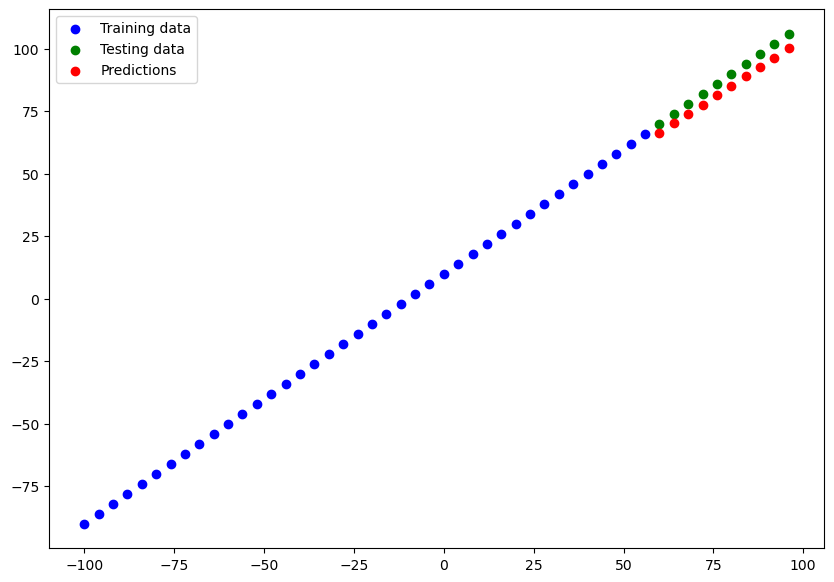

In [37]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data = X_test,
                 test_labels=y_test,
                 predictions=y_preds)

### Evaluating our model's predictions using regression evaluation metrics

Depending on the problem we're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE = mean absolute error, on average , how wrong is each of my model's predictions"
* MSE - mean squared error, square the average errors.

In [38]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 4.7016 - mae: 4.7016


[4.701567649841309, 4.701567649841309]

In [39]:

np.sum(np.abs(y_preds.flatten() - y_test.numpy())) / len(y_test)

4.701567840576172

In [40]:
mae = tf.keras.metrics.MeanAbsoluteError()
mae(y_test, y_preds)

<tf.Tensor: shape=(), dtype=float32, numpy=4.701567649841309>

In [41]:
# Calculating mean squared error
np.sum(np.square(y_preds.flatten() - y_test.numpy())) / len(y_test)

22.559562206751433

In [42]:
mse = tf.keras.metrics.MeanSquaredError()
mse(y_test, y_preds)


<tf.Tensor: shape=(), dtype=float32, numpy=22.559560775756836>

In [43]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  mae = tf.keras.metrics.MeanAbsoluteError()
  mae.update_state(y_true, y_pred)
  return mae.result().numpy()

def mse(y_true, y_pred):
  mse = tf.keras.metrics.MeanSquaredError()
  mse.update_state(y_true, y_pred)
  return mse.result().numpy()

mae(y_test, y_preds), mse(y_test, y_preds)

(4.7015676, 22.55956)

## Running experiments to improve our model

```
Build a model -> fit a model -> evaluate it -> tweat it -> fit it -> evaluate it ->.......
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).

2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.

3. Train for longer - give your model more of a change to find patterns in the data.

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer , trained for 100 epochs.

2. `model_2` - 2 layers, trained for 100 epochs.

3. `model_3` - 2 layers, trained for 500 epochs.


**Build model_1**

In [44]:
# set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# 3. Fit the model
model_1.fit(tf.reshape(X_train, shape=[-1, 1]), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 80.4661 - mae: 80.4661 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 45.3673 - mae: 45.3673
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 13.4195 - mae: 13.4195
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.6761 - mae: 8.6761
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.4385 - mae: 8.4385
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 9.1918 - mae: 9.1918
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.2531 - mae: 8.2531
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 8.9309 - mae: 8.9309
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 7.9663 - mae: 7.9663
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 9.6148 - mae: 9.6148
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.9484 - mae: 7.9484
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 9.6031 - mae: 9.6031
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2

In [45]:
# Make and plot predictions for model_1
y_preds_model_1 = model_1.predict(X_test)
y_preds_model_1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


array([[57.216473],
       [60.93828 ],
       [64.66009 ],
       [68.38189 ],
       [72.1037  ],
       [75.8255  ],
       [79.54731 ],
       [83.26912 ],
       [86.99092 ],
       [90.71273 ]], dtype=float32)

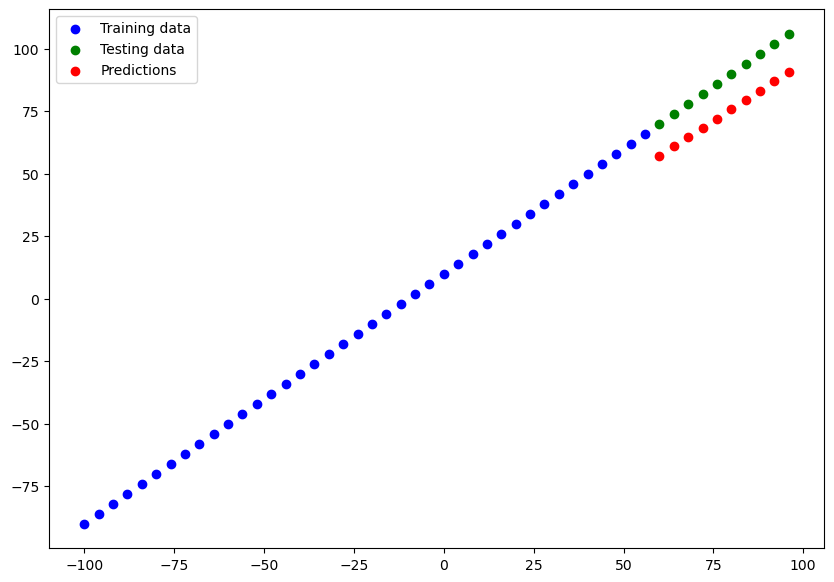

In [46]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds_model_1)

In [47]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_model_1)
mse_1 = mse(y_test, y_preds_model_1)
mae_1, mse_1

(14.0354, 197.6309)

**Build `model_2`**

* 2 Dense layers, trained for 100 epochs

In [48]:
tf.random.set_seed(42)
# Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# fit the model
model_2.fit(tf.reshape(X_train, shape=[-1, 1]), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 73.4715 - mae: 73.4715 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 12.5806 - mae: 12.5806
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 15.0973 - mae: 15.0973
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 13.7708 - mae: 13.7708
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 17.3919 - mae: 17.3919
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 9.8585 - mae: 9.8585
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 10.9534 - mae: 10.9534
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 12.0675 - mae: 12.0675
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 13.2178 - mae: 13.2178
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 15.8138 - mae: 15.8138
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 9.2737 - mae: 9.2737
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 10.2217 - mae: 10.2217
Epoch 13/100
2/2 ━━━━━━━━━━━

In [49]:
# Make and plot predictions for model_2
y_preds_model_2 = model_2.predict(X_test)
y_preds_model_2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


array([[45.70864 ],
       [48.616306],
       [51.523975],
       [54.43165 ],
       [57.33932 ],
       [60.24699 ],
       [63.154655],
       [66.06233 ],
       [68.96999 ],
       [71.87767 ]], dtype=float32)

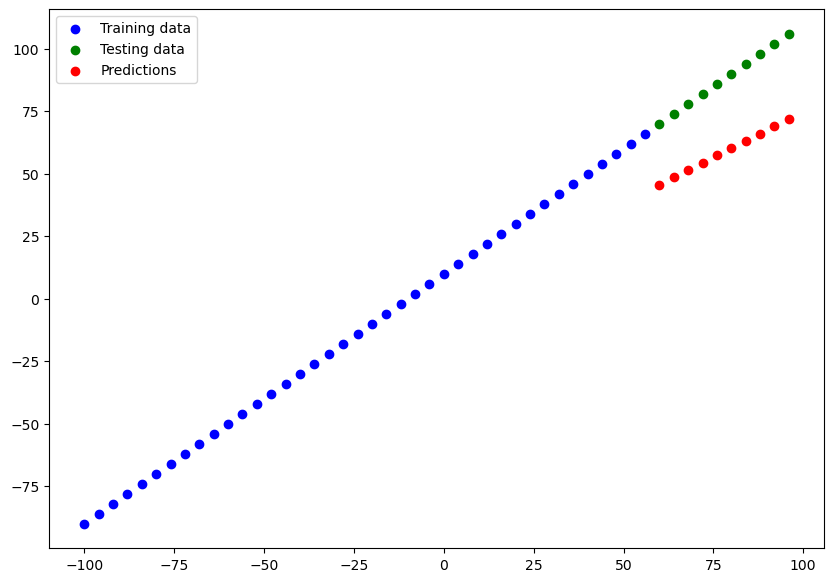

In [50]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds_model_2)

In [54]:
mae_2 = mae(y_test, y_preds_model_2)
mse_2 = mse(y_test, y_preds_model_2)
mae_2, mse_2

(29.206848, 862.88367)

**Build `model_3`**

In [55]:
tf.random.set_seed(42)

# build the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile a model
model_3.compile(loss=tf.keras.losses.mae ,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# fit the model
model_3.fit(tf.reshape(X_train, shape=[-1, 1]), y_train, epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 23.5077 - mae: 23.5077 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 22.0640 - mae: 22.0640
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 22.2832 - mae: 22.2832
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 14.4161 - mae: 14.4161
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 18.7234 - mae: 18.7234
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 13.2942 - mae: 13.2942
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 15.2982 - mae: 15.2982
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 11.0406 - mae: 11.0406
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 14.8420 - mae: 14.8420
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 15.8271 - mae: 15.8271
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 12.0077 - mae: 12.0077
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 15.0361 - mae: 15.0361
Epoch 13/500
2/2 ━━━━━━━

In [56]:
# Make and plot predictions for model_3
y_preds_model_3 = model_3.predict(X_test)
y_preds_model_3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


array([[42.85524 ],
       [45.28696 ],
       [47.71868 ],
       [50.1504  ],
       [52.582115],
       [55.013836],
       [57.445557],
       [59.877277],
       [62.30899 ],
       [64.740715]], dtype=float32)

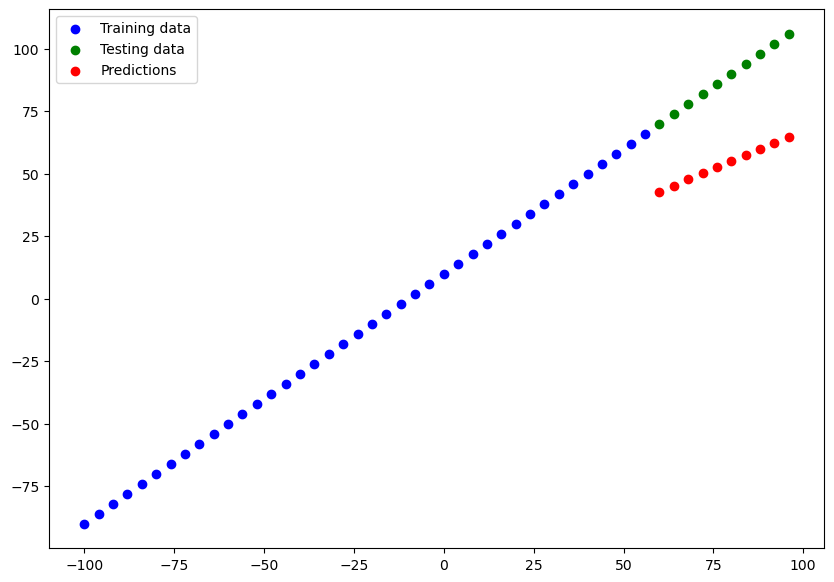

In [57]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds_model_3)

In [58]:
mae_3 = mae(y_test, y_preds_model_3)
mse_3 = mse(y_test, y_preds_model_3)
mae_3, mse_3

(34.202023, 1190.0693)

**NOTE:** You want to start with small experiments (small models) and make sure they work and then increase theri scale when necessary.

## Comparing the results of our experiments

we've run a few experiments, let's compare the results.

In [59]:
# Let's compare our model's results using a pandas dataFrame
import pandas as pd

model_results = [['model_1', mae_1, mse_1],
                 ['model_2', mae_2, mse_2],
                 ['model_3', mse_3, mse_3]]

all_results = pd.DataFrame(model_results, columns=['model', 'mae', 'mse'])

In [60]:
all_results

,model,mae,mse
0,model_1,14.035400,197.630905
1,model_2,29.206848,862.883667
2,model_3,1190.069336,1190.069336


> **NOTE:** One of your main goals should be to minimize the time between your experiments. The more experiments you do the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practioner's motto: 'experiment, experiment, experiment'

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious, if you're running lots of experiments.

Luckily, there are tools to help us such as `MLFlow`,  `Weights and Biases`, `TensorBoard` etc.

## Saving our models

Saving our models allows us to use them outside of Google Colab (using in web application or somewhere else)

There are two main formats we can save our model's too:

1. The SavedModel format
2. The HDF5 format

In [63]:
# Save the model using SavedModel Format
model_1.save('models/model_1_saved_model.h5')

## Loading our models

In [64]:
# laod in the SavedModel format model 
loaded_SavedModel_format = tf.keras.models.load_model('models/model_1_saved_model.h5')
loaded_SavedModel_format.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [65]:
model_1.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [77]:
# Compare model_1 predictions with SavedModel predictions 
model_1_preds = model_1.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_1_preds == loaded_SavedModel_format_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [69]:
model_1_preds, loaded_SavedModel_format_preds

(array([[57.216473],
        [60.93828 ],
        [64.66009 ],
        [68.38189 ],
        [72.1037  ],
        [75.8255  ],
        [79.54731 ],
        [83.26912 ],
        [86.99092 ],
        [90.71273 ]], dtype=float32),
 array([[57.216473],
        [60.93828 ],
        [64.66009 ],
        [68.38189 ],
        [72.1037  ],
        [75.8255  ],
        [79.54731 ],
        [83.26912 ],
        [86.99092 ],
        [90.71273 ]], dtype=float32))

## A Larger Example

In [79]:
# Import required libraries 
import tensorflow as tf 
import pandas as pd 
import matplotlib.pyplot as plt 

In [80]:
# Read in the insurance dataset 
insurance = pd.read_csv(r'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [81]:
insurance.shape

(1338, 7)

In [82]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [86]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [106]:
# let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance, dtype=int)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [107]:
# Create X and y values (features and labels)
# Create training and test sets 

In [129]:
X = insurance_one_hot.drop('charges', axis=1)
y = insurance_one_hot['charges']

In [130]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [131]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [132]:
# Splitting data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1070, 11), (1070,), (268, 11), (268,))

In [135]:
# Build a neural network (sort of like model_2 or model_3 above)
tf.random.set_seed(42)

# Create a model 
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile a model 
insurance_model.compile(loss=tf.keras.losses.mae, 
                       optimizer=tf.keras.optimizers.SGD(),
                       metrics=['mae'])

# Fit the model 
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10098.7266 - mae: 10098.7266   
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7545.5654 - mae: 7545.5654 
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7493.5034 - mae: 7493.5034 
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7182.8066 - mae: 7182.8066 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7856.1816 - mae: 7856.1816 
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7677.0425 - mae: 7677.0425 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7442.4360 - mae: 7442.4360 
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7287.9697 - mae: 7287.9697 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7897.7197 - mae: 7897.7197 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7445.2241 - mae: 7445.2241 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7625.0469 - mae: 7625.0469 
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━

In [136]:
# Check the results of the insurance model on the test data 
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6126.1646 - mae: 6126.1646  


[5966.8369140625, 5966.8369140625]

In [140]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model isn't performing too well... let's try to improve it.

### Let's Try to imporve the performance of the model 1 Tweak at a time.

In [162]:
# let's increase hidden layers by 1 and units

insurance_model_extra_hid_layer = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_extra_hid_layer.compile(loss=tf.keras.losses.mae,
                                       optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                                       metrics=['mae'])

insurance_model_extra_hid_layer.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12281.7275 - mae: 12281.7275   
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7502.5762 - mae: 7502.5762 
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7272.1797 - mae: 7272.1797 
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7162.7061 - mae: 7162.7061 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7536.7319 - mae: 7536.7319 
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7134.9595 - mae: 7134.9595 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7409.4941 - mae: 7409.4941 
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7327.0347 - mae: 7327.0347 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7101.1118 - mae: 7101.1118 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7115.2539 - mae: 7115.2539 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7372.5444 - mae: 7372.5444 
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━

In [144]:
# Let's evalute the model 
insurance_model_extra_hid_layer.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7637.1387 - mae: 7637.1387  


[7563.521484375, 7563.521484375]

**Poor Results that before**

In [146]:
# Try Changing the Optimizer (SGD ----> ADAM)

insurance_model_adam_optimizer = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_adam_optimizer.compile(loss=tf.keras.losses.mae,
                                       optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                                       metrics=['mae'])

insurance_model_adam_optimizer.fit(X_train, y_train, epochs=100)


Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13284.4131 - mae: 13284.4131
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13253.4541 - mae: 13253.4541 
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13213.4336 - mae: 13213.4336 
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13154.4160 - mae: 13154.4160 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13064.0781 - mae: 13064.0781 
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12926.4795 - mae: 12926.4795 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12723.5518 - mae: 12723.5518 
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12435.7354 - mae: 12435.7354 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12043.9492 - mae: 12043.9492 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11537.6836 - mae: 11537.6836 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10921.1270 - mae: 10921.1270 
Epoch 12/100
34/34 ━

In [163]:
# Let's evaluate the model 
insurance_model_adam_optimizer.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6617.5249 - mae: 6617.5249  


[6429.40283203125, 6429.40283203125]

**Better Than Before**

In [172]:
# Let's train longer with adam 
insurance_model_adam_longer = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_adam_longer.compile(loss=tf.keras.losses.mae,
                                       optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                                       metrics=['mae'])

history = insurance_model_adam_longer.fit(X_train, y_train, epochs=300)

Epoch 1/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13275.2256 - mae: 13275.2256
Epoch 2/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13156.9814 - mae: 13156.9814 
Epoch 3/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12890.5977 - mae: 12890.5977 
Epoch 4/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12329.7109 - mae: 12329.7109 
Epoch 5/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11328.5537 - mae: 11328.5537 
Epoch 6/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9925.5508 - mae: 9925.5508   
Epoch 7/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8484.3047 - mae: 8484.3047 
Epoch 8/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7583.1001 - mae: 7583.1001 
Epoch 9/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7401.6328 - mae: 7401.6328 
Epoch 10/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7370.5415 - mae: 7370.5415 
Epoch 11/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7349.7910 - mae: 7349.7910 
Epoch 12/300
34/34 ━━━━━━━━━━━

In [173]:
# Let's evaluate the model
insurance_model_adam_longer.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3213.2935 - mae: 3213.2935  


[3165.44921875, 3165.44921875]

**WOW The Loss Decrease by 50%**

In [174]:
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6126.1646 - mae: 6126.1646 


[5966.8369140625, 5966.8369140625]

Text(0.5, 0, 'epochs')

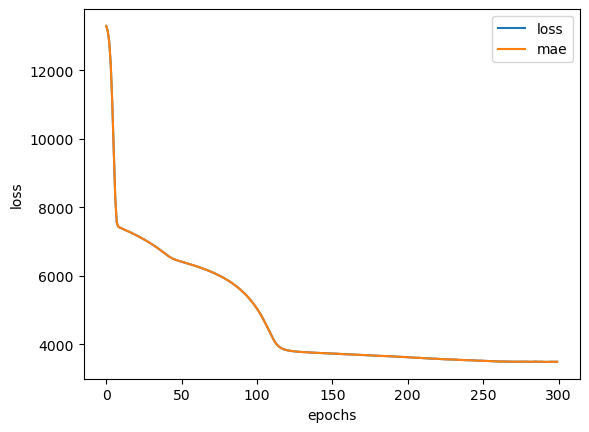

In [175]:
# Plot history (also known as loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

> 🤔**Question:** How long should you train for?

it depends ... Really it depends on the problem you're working on. However many people have asked this question before.... so Tensorflow has a solution It's called EarlyStopping Callback which is a tensorflow component you can add to your model to stop training onces its stops improving on certain metric.

### Preprocessing data (normalization and Standardization)

It terms of scaling values, neural networks tend to prefer normalization.

If you're not sure on which to use, try both and see what works better.

In [178]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


<Axes: >

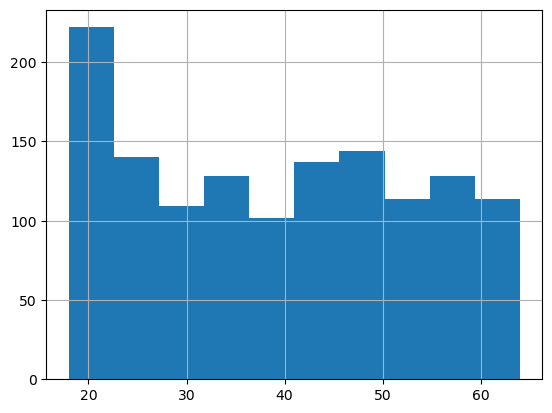

In [180]:
X['age'].hist()

<Axes: >

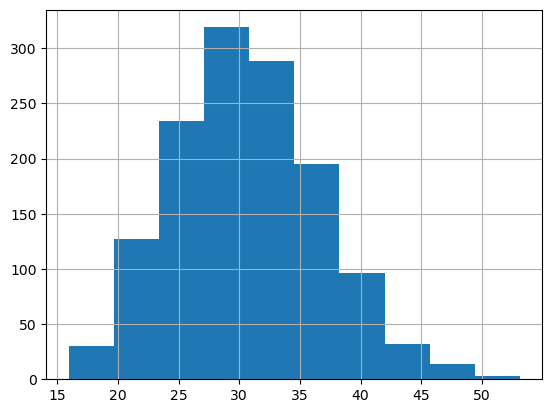

In [181]:
X['bmi'].hist()

In [188]:
X['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [190]:
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv(r'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [193]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer 
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']), # Turn all vals in these cols b/w 0 and 1
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

# Create X and y values 
X = insurance.drop('charges', axis=1)
y = insurance['charges']

# Split dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization and encoding
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [194]:
# What does our data look like now?
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [195]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [196]:
X_train_normal.shape

(1070, 11)

Beautiful! Our data has been normalized and one hot encoded. Now let's build a neural network model on it and see how it goes 

In [204]:
insurance_preprocessed_model = tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

insurance_preprocessed_model.compile(loss=tf.keras.losses.mae,
                                       optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                                       metrics=['mae'])

history = insurance_preprocessed_model.fit(X_train_normal, y_train, epochs=200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 13296.9062 - mae: 13296.9062
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13283.0059 - mae: 13283.0059 
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13234.0898 - mae: 13234.0898 
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13105.7725 - mae: 13105.7725 
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12845.6250 - mae: 12845.6250 
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12398.8418 - mae: 12398.8418 
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11721.8262 - mae: 11721.8262 
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10871.4541 - mae: 10871.4541 
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9995.6143 - mae: 9995.6143   
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9178.0898 - mae: 9178.0898 
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8551.9082 - mae: 8551.9082 
Epoch 12/200
34/34 ━━━━━

In [205]:
# Let's evaluate our model 
insurance_preprocessed_model.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3212.4531 - mae: 3212.4531  


[3159.714599609375, 3159.714599609375]

Text(0.5, 0, 'epochs')

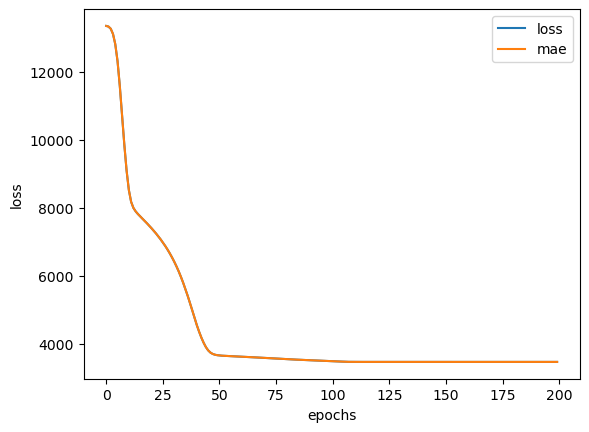

In [206]:
# Plot history (also known as loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [212]:
# Let's try learning rate scheduling 

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,   
    decay_steps=75,                
    decay_rate=0.96,               
    staircase=True                
)

insurance_preprocessed_model_lr_schedule = tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

insurance_preprocessed_model_lr_schedule.compile(loss=tf.keras.losses.mae,
                                       optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
                                       metrics=['mae'])

history = insurance_preprocessed_model_lr_schedule.fit(X_train_normal, y_train, epochs=200)


Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 13297.2559 - mae: 13297.2559
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13283.4199 - mae: 13283.4199 
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13234.8018 - mae: 13234.8018 
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13113.9541 - mae: 13113.9541 
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12875.9346 - mae: 12875.9346 
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12488.8184 - mae: 12488.8184 
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11915.8955 - mae: 11915.8955 
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11188.2109 - mae: 11188.2109 
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10424.4688 - mae: 10424.4688 
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9673.8311 - mae: 9673.8311 
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9020.7363 - mae: 9020.7363 
Epoch 12/200
34/34 ━━━━━

In [213]:
insurance_preprocessed_model_lr_schedule.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3564.3481 - mae: 3564.3481  


[3474.843994140625, 3474.843994140625]

Text(0.5, 0, 'epochs')

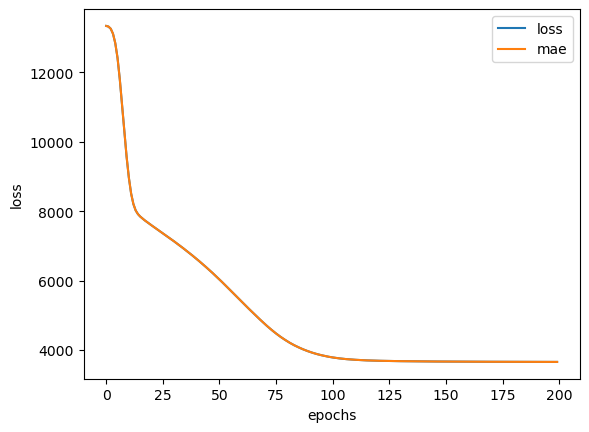

In [214]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')